In [1]:
# Import libraries
import pandas as pd
from IPython.display import HTML
from IPython.display import Image
from plotnine import *
from plotnine.data import *
import matplotlib.pyplot as plt

In [2]:
# Read data
data=pd.read_csv('../data/data_included.csv')
data['birth_date']=pd.to_datetime(data['birth_date'], errors='coerce')

# Create a dataframe with MPs by month
monthly_df=data.groupby(data['birth_date'].dt.month).count()[['name']]
monthly_df.index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monthly_df['percentage']=(monthly_df['name']/monthly_df['name'].sum()*100).round(2)
monthly_df.rename(columns={'name':'count'},inplace=True)
monthly_df


C:\Users\Ojas\AppData\Local\Temp\ipykernel_13172\2848483088.py:2: DtypeWarning: Columns (18,19,21) have mixed types. Specify dtype option on import or set low_memory=False.


,count,percentage
Jan,3712,8.97
Feb,3167,7.65
Mar,3576,8.64
Apr,3465,8.37
May,3569,8.63
Jun,3517,8.50
Jul,3502,8.46
Aug,3553,8.59
Sep,3472,8.39
Oct,3343,8.08


In [3]:
# Import births data
from UN_monthly_births import births_df
births_df.drop(['births_count'],axis=1,inplace=True)
births_df

,births_percentage
Jan,8.73
Feb,7.75
Mar,8.29
Apr,7.95
May,8.22
Jun,8.12
Jul,8.65
Aug,8.72
Sep,8.74
Oct,8.58


In [4]:
# Merging the data and adding columns for difference and percentage difference

df=pd.merge(monthly_df,births_df,how='inner',left_index=True,right_index=True)
df['percentage']=(df['count']/df['count'].sum()*100).round(2)
df['difference']=df['percentage']-df['births_percentage']
df['pc_difference']=df['difference']/df['births_percentage']*100
df['pc_difference']=df['pc_difference'].round(2)
df.index=pd.CategoricalIndex(df.index, categories=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], ordered=True)
df

,count,percentage,births_percentage,difference,pc_difference
Jan,3712,8.97,8.73,0.24,2.75
Feb,3167,7.65,7.75,-0.10,-1.29
Mar,3576,8.64,8.29,0.35,4.22
Apr,3465,8.37,7.95,0.42,5.28
May,3569,8.63,8.22,0.41,4.99
Jun,3517,8.50,8.12,0.38,4.68
Jul,3502,8.46,8.65,-0.19,-2.20
Aug,3553,8.59,8.72,-0.13,-1.49
Sep,3472,8.39,8.74,-0.35,-4.00
Oct,3343,8.08,8.58,-0.50,-5.83


In [26]:
# Plotnine requires a different kind of dataframe for double bar plot
df_for_double_plot=pd.concat([df[['percentage']], df[['births_percentage']].rename(columns={'births_percentage':'percentage'})], axis=0).reset_index()
df_for_double_plot['category']=['MPs' if x<12 else 'Births' for x in range(24)]

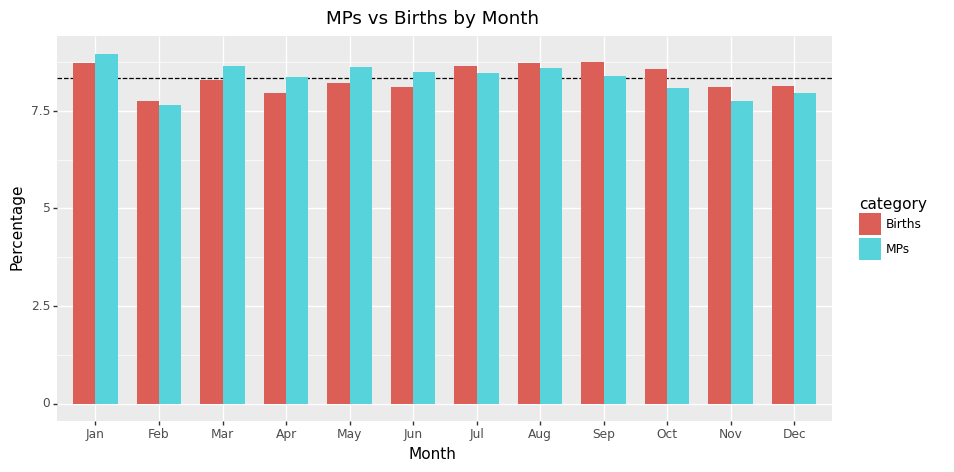

<ggplot: (154218664262)>

In [27]:
# Double bar plot in plotnine
ggplot(df_for_double_plot, aes(x='index', y='percentage', fill='category')) \
    + geom_hline(yintercept=8.33, linetype='dashed', color='black') \
    + geom_bar(stat='identity', position='dodge', width=0.7) \
    + labs(x='Month', y='Percentage', title='MPs vs Births by Month') \
    + theme(figure_size=(10, 5)) 
    

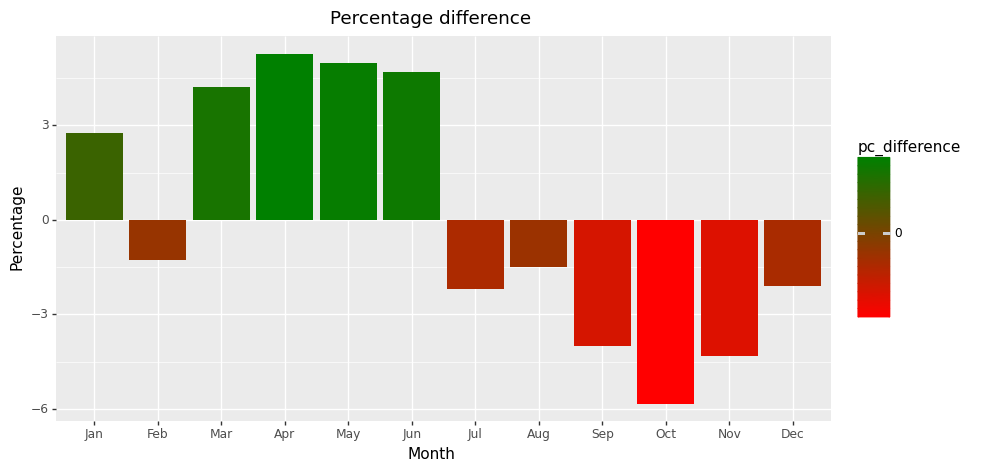

<ggplot: (154218596220)>

In [7]:
# Percentage difference plot
ggplot(df,aes(x='df.index',y='pc_difference', fill='pc_difference')) \
    + geom_bar(stat='identity') \
    + labs(title='Percentage difference',x='Month',y='Percentage') \
    + scale_fill_gradient(low='red',high='green', breaks=[0]) \
    + theme(figure_size=(10,5))

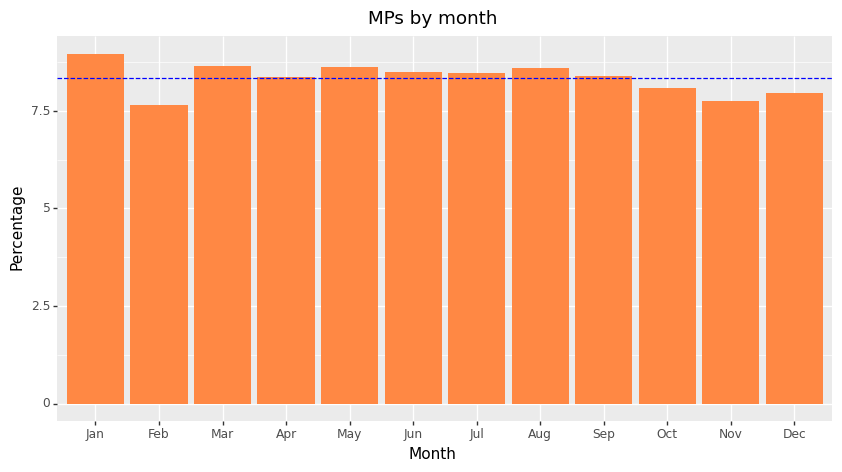

<ggplot: (154219249487)>

In [8]:
ggplot(df,aes(x='df.index',y='percentage')) \
    + geom_bar(stat='identity', fill='#FF8844') \
    + labs(title='MPs by month',x='Month',y='Percentage') \
    + geom_hline(yintercept=8.33,linetype='dashed',color='blue') \
    + theme(figure_size=(10,5))

# Further Analysis

Based on hemisphere, HDI, V-Dem score, Income Category, Mean years of Schooling.

In [9]:
import utils
# This module contains lists of top and bottom countries for each index

In [10]:
# Analysis for HDI. Top countries are those with HDI>0.8, bottom countries are those with HDI<0.7.
top_hdi=data.query('country in @utils.high_hdi')
top_hdi_monthly=top_hdi.groupby(data['birth_date'].dt.month).count()[['name']]
bottom_hdi=data.query('country in @utils.low_hdi')
bottom_hdi_monthly=bottom_hdi.groupby(data['birth_date'].dt.month).count()[['name']]

monthly_df=pd.merge(top_hdi_monthly,bottom_hdi_monthly,how='inner',left_index=True,right_index=True)
monthly_df.rename(columns={'name_x':'top_hdi','name_y':'bottom_hdi'},inplace=True)
monthly_df['top_hdi_percentage']=(monthly_df['top_hdi']/monthly_df['top_hdi'].sum()*100).round(2)
monthly_df['bottom_hdi_percentage']=(monthly_df['bottom_hdi']/monthly_df['bottom_hdi'].sum()*100).round(2)
monthly_df.index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monthly_df

,top_hdi,bottom_hdi,top_hdi_percentage,bottom_hdi_percentage
Jan,2326,292,8.88,10.38
Feb,2084,203,7.96,7.22
Mar,2285,218,8.73,7.75
Apr,2271,188,8.67,6.69
May,2275,234,8.69,8.32
Jun,2234,249,8.53,8.85
Jul,2207,238,8.43,8.46
Aug,2211,248,8.44,8.82
Sep,2229,212,8.51,7.54
Oct,2075,233,7.92,8.29


In [11]:
# Analysis for mean years of schooling. Top 50 vs bottom 50 countries.
top_mys=data.query('country in @utils.top_50_mys')
top_mys_monthly=top_mys.groupby(data['birth_date'].dt.month).count()[['name']]
bottom_mys=data.query('country in @utils.bottom_50_mys')
bottom_mys_monthly=bottom_mys.groupby(data['birth_date'].dt.month).count()[['name']]

monthly_df=pd.merge(top_mys_monthly,bottom_mys_monthly,how='inner',left_index=True,right_index=True)
monthly_df.rename(columns={'name_x':'top_mys','name_y':'bottom_mys'},inplace=True)
monthly_df['top_mys_percentage']=(monthly_df['top_mys']/monthly_df['top_mys'].sum()*100).round(2)
monthly_df['bottom_mys_percentage']=(monthly_df['bottom_mys']/monthly_df['bottom_mys'].sum()*100).round(2)
monthly_df.index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monthly_df

,top_mys,bottom_mys,top_mys_percentage,bottom_mys_percentage
Jan,1911,123,8.76,12.68
Feb,1750,73,8.02,7.53
Mar,1939,50,8.88,5.15
Apr,1902,66,8.71,6.80
May,1899,79,8.70,8.14
Jun,1885,65,8.64,6.70
Jul,1833,86,8.40,8.87
Aug,1835,103,8.41,10.62
Sep,1856,54,8.50,5.57
Oct,1699,85,7.78,8.76


In [12]:
# Analysis for World Bank income category. High vs low income countries.
high_income=data.query('country in @utils.high_income')
high_income_monthly=high_income.groupby(data['birth_date'].dt.month).count()[['name']]
low_income=data.query('country in @utils.low_income')
low_income_monthly=low_income.groupby(data['birth_date'].dt.month).count()[['name']]

monthly_df=pd.merge(high_income_monthly,low_income_monthly,how='inner',left_index=True,right_index=True)
monthly_df.rename(columns={'name_x':'high_income','name_y':'low_income'},inplace=True)
monthly_df['high_income_percentage']=(monthly_df['high_income']/monthly_df['high_income'].sum()*100).round(2)
monthly_df['low_income_percentage']=(monthly_df['low_income']/monthly_df['low_income'].sum()*100).round(2)
monthly_df.index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monthly_df

,high_income,low_income,high_income_percentage,low_income_percentage
Jan,2198,50,8.80,10.92
Feb,1985,28,7.95,6.11
Mar,2208,24,8.84,5.24
Apr,2175,36,8.71,7.86
May,2170,28,8.69,6.11
Jun,2126,39,8.51,8.52
Jul,2114,44,8.47,9.61
Aug,2098,49,8.40,10.70
Sep,2085,22,8.35,4.80
Oct,1980,33,7.93,7.21


In [13]:
# V-Dem analysis. I chose electoral democracy index as that is the most relevant. High>0.8, low<0.4.
high_vdem=data.query('country in @utils.high_dem')
high_vdem_monthly=high_vdem.groupby(data['birth_date'].dt.month).count()[['name']]
low_vdem=data.query('country in @utils.low_dem')
low_vdem_monthly=low_vdem.groupby(data['birth_date'].dt.month).count()[['name']]

monthly_df=pd.merge(high_vdem_monthly,low_vdem_monthly,how='inner',left_index=True,right_index=True)
monthly_df.rename(columns={'name_x':'high_vdem','name_y':'low_vdem'},inplace=True)
monthly_df['high_vdem_percentage']=(monthly_df['high_vdem']/monthly_df['high_vdem'].sum()*100).round(2)
monthly_df['low_vdem_percentage']=(monthly_df['low_vdem']/monthly_df['low_vdem'].sum()*100).round(2)
monthly_df.index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monthly_df

,high_vdem,low_vdem,high_vdem_percentage,low_vdem_percentage
Jan,1778,464,8.80,10.65
Feb,1602,292,7.93,6.70
Mar,1768,337,8.75,7.73
Apr,1791,325,8.87,7.46
May,1746,391,8.64,8.97
Jun,1700,383,8.42,8.79
Jul,1727,359,8.55,8.24
Aug,1714,398,8.49,9.13
Sep,1720,333,8.52,7.64
Oct,1601,353,7.93,8.10


In [14]:
# Hemisphere analysis. Northern vs southern hemisphere.
north=data.query('country in @utils.north_hem')
north_monthly=north.groupby(data['birth_date'].dt.month).count()[['name']]
south=data.query('country in @utils.south_hem')
south_monthly=south.groupby(data['birth_date'].dt.month).count()[['name']]

monthly_df=pd.merge(north_monthly,south_monthly,how='inner',left_index=True,right_index=True)
monthly_df.rename(columns={'name_x':'north','name_y':'south'},inplace=True)
monthly_df['north_percentage']=(monthly_df['north']/monthly_df['north'].sum()*100).round(2)
monthly_df['south_percentage']=(monthly_df['south']/monthly_df['south'].sum()*100).round(2)
monthly_df.index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monthly_df

,north,south,north_percentage,south_percentage
Jan,3115,339,9.07,8.30
Feb,2644,298,7.70,7.29
Mar,2960,356,8.62,8.71
Apr,2902,344,8.45,8.42
May,2970,344,8.65,8.42
Jun,2947,334,8.58,8.18
Jul,2904,350,8.45,8.57
Aug,2945,345,8.57,8.45
Sep,2862,333,8.33,8.15
Oct,2757,346,8.03,8.47
